In [ ]:
# For Loading and Manipulating the data
import numpy as np
import pandas as pd
from itertools import combinations

# For splitting and scaling the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# For Evaluation 
from sklearn.metrics import classification_report, confusion_matrix
from time import time

# For Visualization Purposes 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# To display all the columns ( regardless of their number or their width )
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# To change the style of the plots ( so that we all can see the same thing :) )
plt.style.use('seaborn')

In [ ]:
# for make more accurate visualizations 
def countplot(data,x,w=10,h=7,hue=None,ax=None,order_desc= False):
    plt.figure(figsize=(w,h))
    ax = sns.countplot(data=data,x=x,hue=hue,ax=ax,order= data[x].value_counts().index if order_desc == True else None)
    
    for patch in ax.patches:
        loc = patch.get_x()
        width = patch.get_width()
        height = patch.get_height()
        
        ax.text(loc+width/2,height,str(height),fontsize = 10,weight="bold",color='brown',ha = "center")
#........................................................................................................................        
def scatterplot(data,x,y,hue=None,ax=None):
    ax =  sns.scatterplot(data=data, x=x, y=y, hue=hue, ax=ax)
    ax.set_title(f"{x} with {y}",fontsize=15,color="brown")    
    if hue:
        ax.legend(prop={"size":20},frameon=True,Shadow=False)

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

In [ ]:
# Exploring, understanding the data
def check_data(dataframe,head=5):
    print(20*"-" + "Information".center(20) + 20*"-")
    print(dataframe.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(dataframe.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    display(dataframe.head())
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-")
    display(dataframe.tail())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(dataframe.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(dataframe.describe().T)

check_data(df)


--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
--------------------     Data Shape     --------------------
(768, 9)

--------------------  The First 5 Data  --------------------


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



--------------------  The Last 5 Data   --------------------


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0



--------------------   Missing Values   --------------------
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

----------------------------------------           Describe the Data            ----------------------------------------
                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.300

In [ ]:
"""Conclusion:
we have (768,9) data shape.
it's good being columns already numerical and has no nan or missing values, but there may be hidden missing values, let's see..
we can notice that unexpexted values for min values in ["Glucose","BloodPressure","Insulin","SkinThickness","BMI"] columns, i will deal with them as a nan values..
"""

In [ ]:
df.duplicated().sum()

0

In [ ]:
# this for loop to see all the data that have unexpected values
cols = ["Glucose","BloodPressure","Insulin","SkinThickness","BMI"]
to_see = []
for col in cols:
    unex_values = df[df[col] == 0]
    to_see.append(unex_values)
to_see

[     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 75             1        0             48             20        0  24.7   
 182            1        0             74             20       23  27.7   
 342            1        0             68             35        0  32.0   
 349            5        0             80             32        0  41.0   
 502            6        0             68             41        0  39.0   
 
      DiabetesPedigreeFunction  Age  Outcome  
 75                      0.140   22        0  
 182                     0.299   21        0  
 342                     0.389   22        0  
 349                     0.346   37        1  
 502                     0.727   41        1  ,
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 7             10      115              0              0        0  35.3   
 15             7      100              0              0        0  30.0   
 49             7      105              

In [ ]:
df[cols] = df[cols].replace(0,np.nan)

In [ ]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


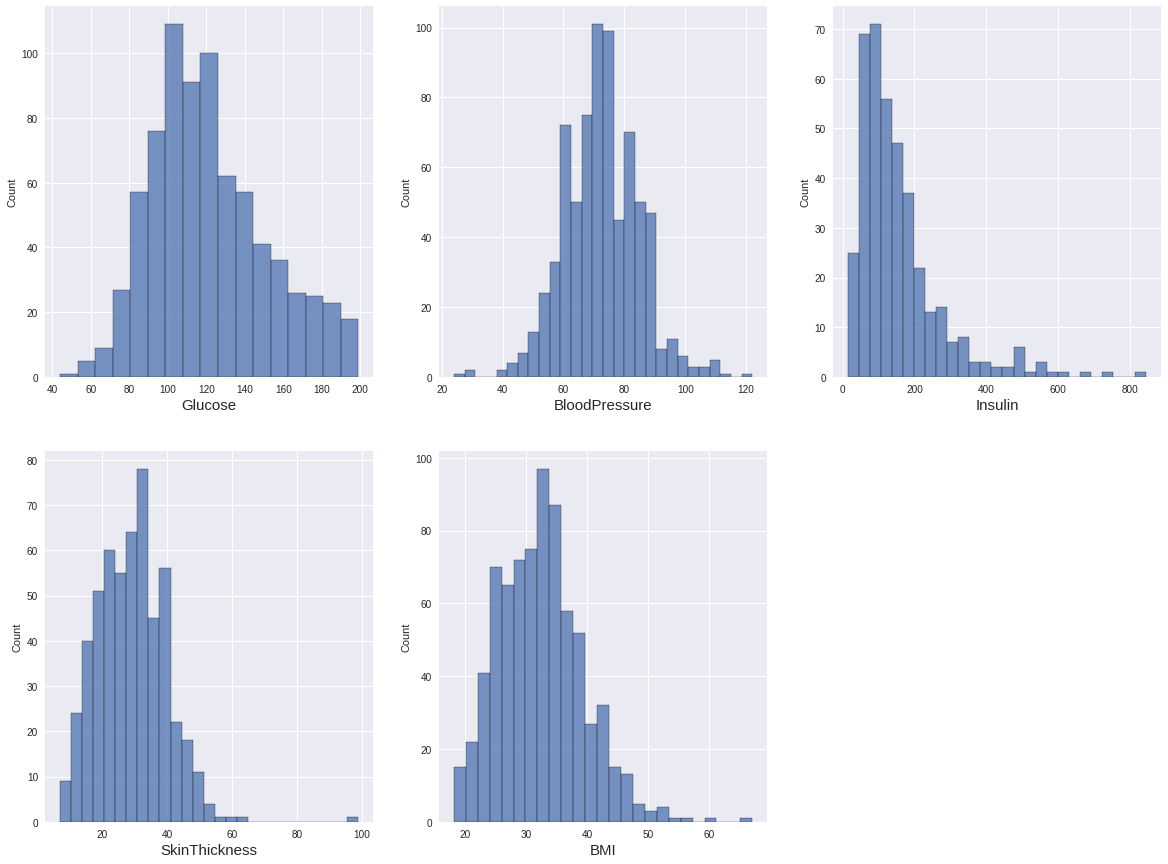

In [ ]:
#see the type of our data distributions to decide how can impute it..!
plt.figure(figsize=(20,15))
for i,col in enumerate(cols):
    plt.subplot(2,3,i+1)
    sns.histplot(data=df,x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)

In [ ]:
"""
Our Insights:

Glucose:
    - skweed to right so we will impute it by (median)
BloodPressure:
    - looks normal so (mean or mrdian)
SkinThickness:
    - skweed to right approximately so (median)
BMI:
    - skweed to right so (median)
"""

In [ ]:
for col in cols:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

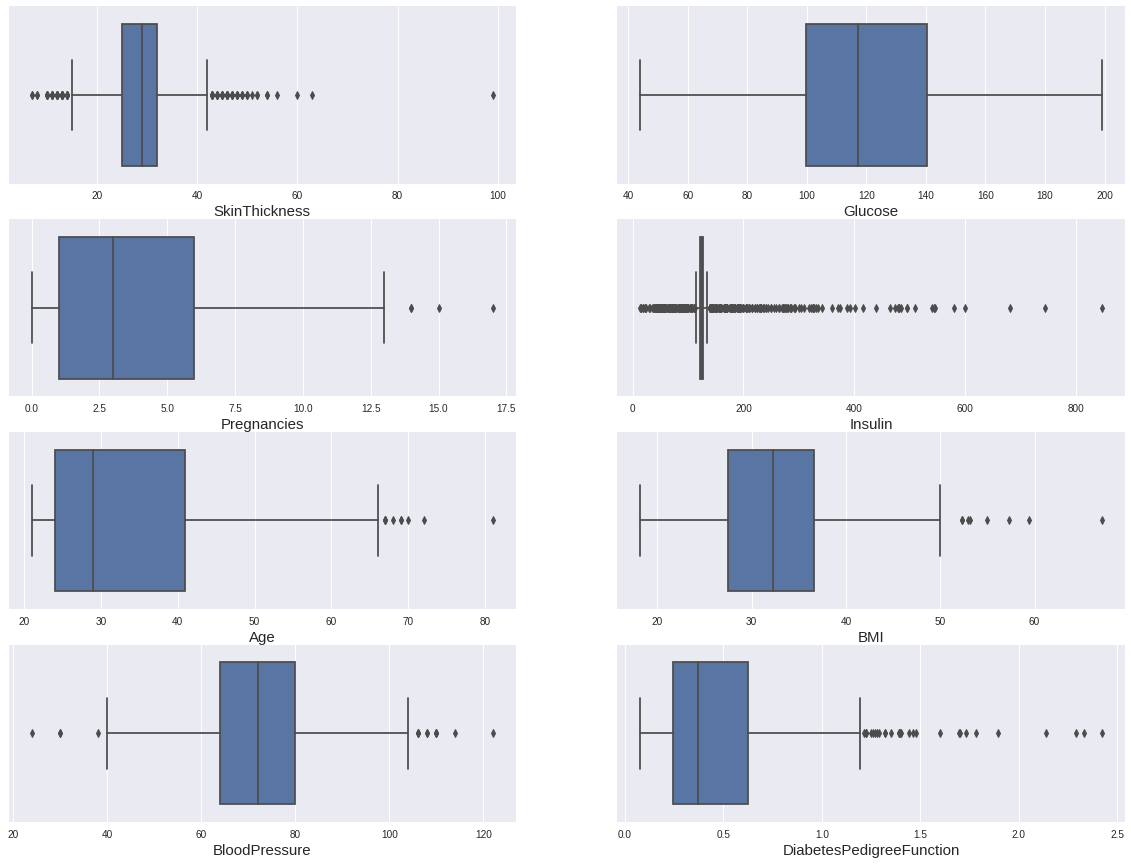

In [ ]:
# detect outliers by boxplot visualization
plt.figure(figsize=(20,15))
for i,col in enumerate(set(df.columns)-{'Outcome'}):
    plt.subplot(4,2,i+1)
    sns.boxplot(data=df,x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)

In [ ]:
# Function to detect outliers in every feature and fix it
def detect_outliers(df):
    outliers= pd.DataFrame(columns=["Feature","NO Outliers","Handled?"])
    for col in list(set(df.select_dtypes(include=np.number).columns)-{'Outcome'}):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        fence_low = q1 - (1.5*iqr)
        fence_high = q3 + (1.5*iqr)
        N_O_O = df.loc[(df[col] < fence_low) | (df[col] > fence_high)].shape[0]
                   
        df.loc[(df[col] < fence_low),col] = fence_low
        df.loc[(df[col] > fence_high),col] = fence_high
        #let's fix them
        #df[col] = np.where((df[col] > fence_high) | (df[col] > fence_high),df[col].median(),df[col])
        outliers = outliers.append({'Feature': col, "NO Outliers": N_O_O ,"Handled?": df[col].all() < fence_high},ignore_index=True)
    return outliers
detect_outliers(df)

,Feature,NO Outliers,Handled?
0,SkinThickness,87,True
1,Glucose,0,True
2,Pregnancies,4,True
3,Insulin,346,True
4,Age,9,True
5,BMI,8,True
6,BloodPressure,14,True
7,DiabetesPedigreeFunction,29,True


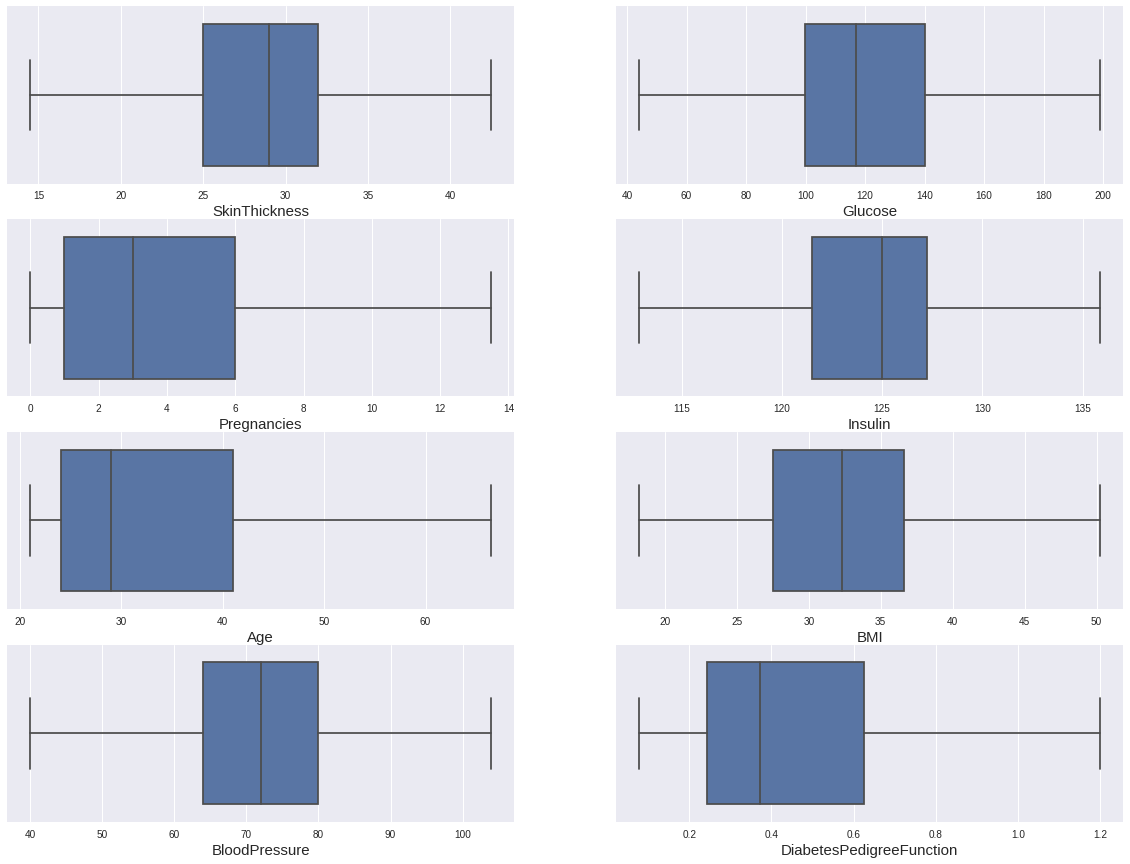

In [ ]:
plt.figure(figsize=(20,15))
for i,col in enumerate(set(df.columns)-{'Outcome'}):
    plt.subplot(4,2,i+1)
    sns.boxplot(data=df,x=col)
    plt.xlabel(col, fontsize=15)
    plt.xticks(fontsize=10)


# New section
##**Exploratory Data Analysis**

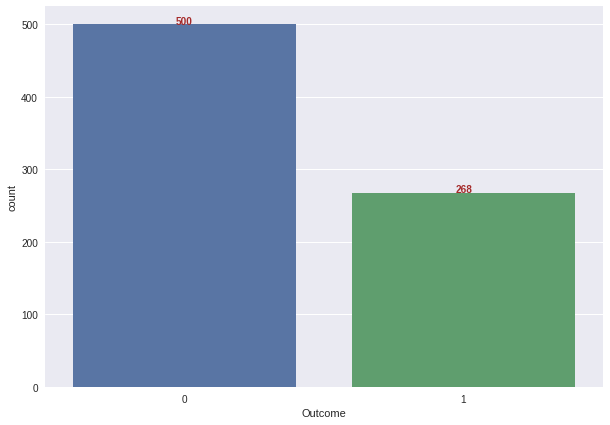

In [ ]:
countplot(df,"Outcome")

In [ ]:
# let's see the unique values for the pregnancies column..
df.Pregnancies.unique()

array([ 6. ,  1. ,  8. ,  0. ,  5. ,  3. , 10. ,  2. ,  4. ,  7. ,  9. ,
       11. , 13. , 13.5, 12. ])

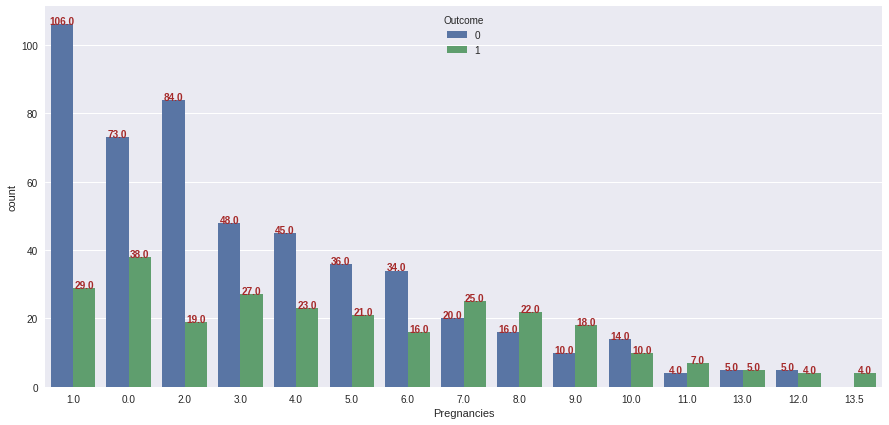

In [ ]:
countplot(df,"Pregnancies",15,7, hue="Outcome",order_desc= True)

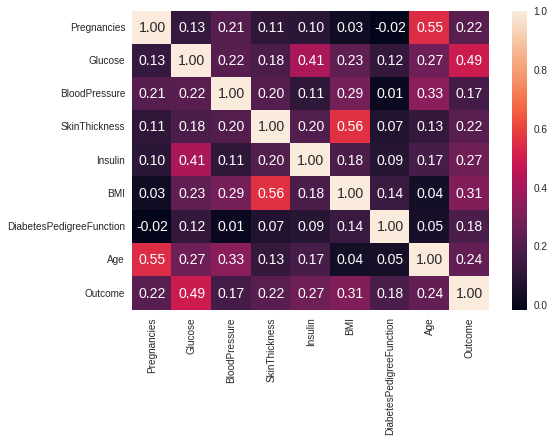

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', annot_kws={'fontsize':14});

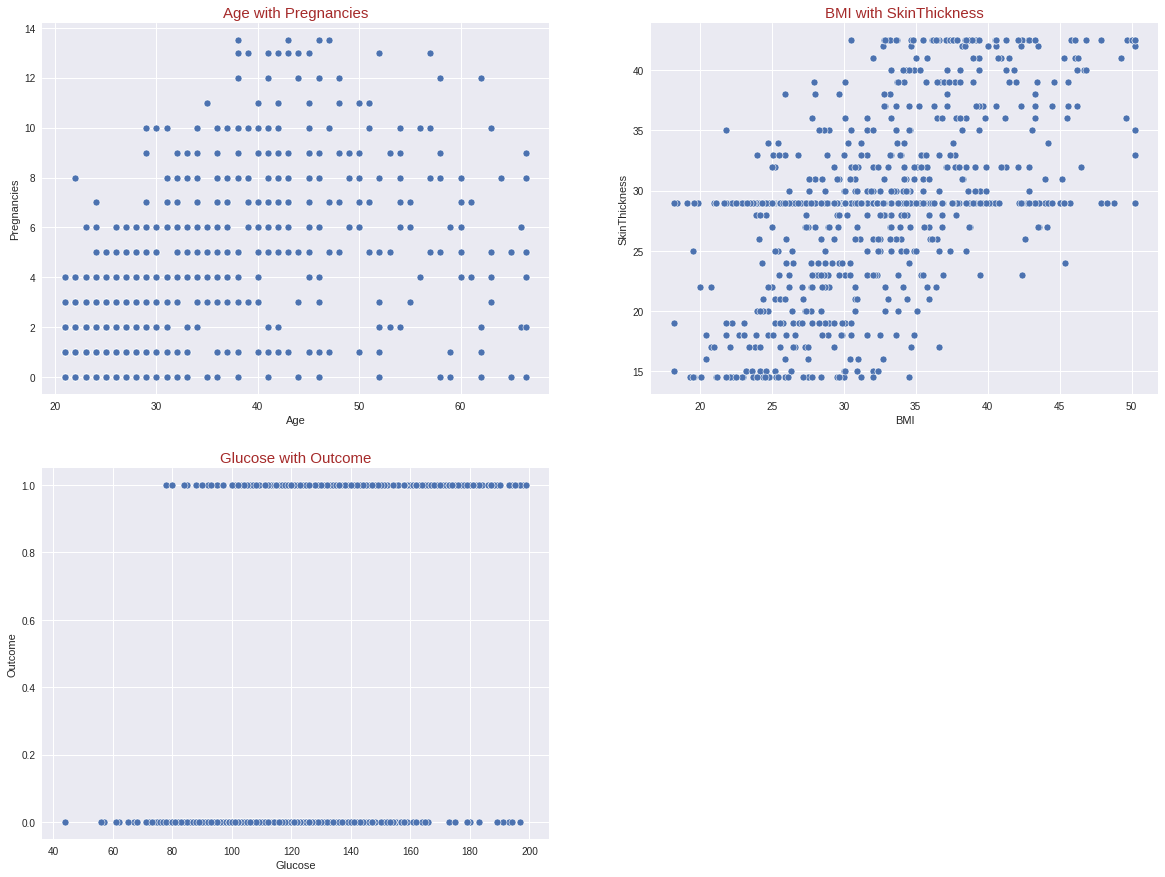

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
scatterplot(df,x='Age',y='Pregnancies')
plt.subplot(2,2,2)
scatterplot(df,x='BMI',y='SkinThickness')
plt.subplot(2,2,3)
scatterplot(df,x='Glucose',y='Outcome')

In [ ]:
"""from heatmap these are the most features have strong relation between each other

let's see the relation between each feature and the outcome column but by barplot this time.."""

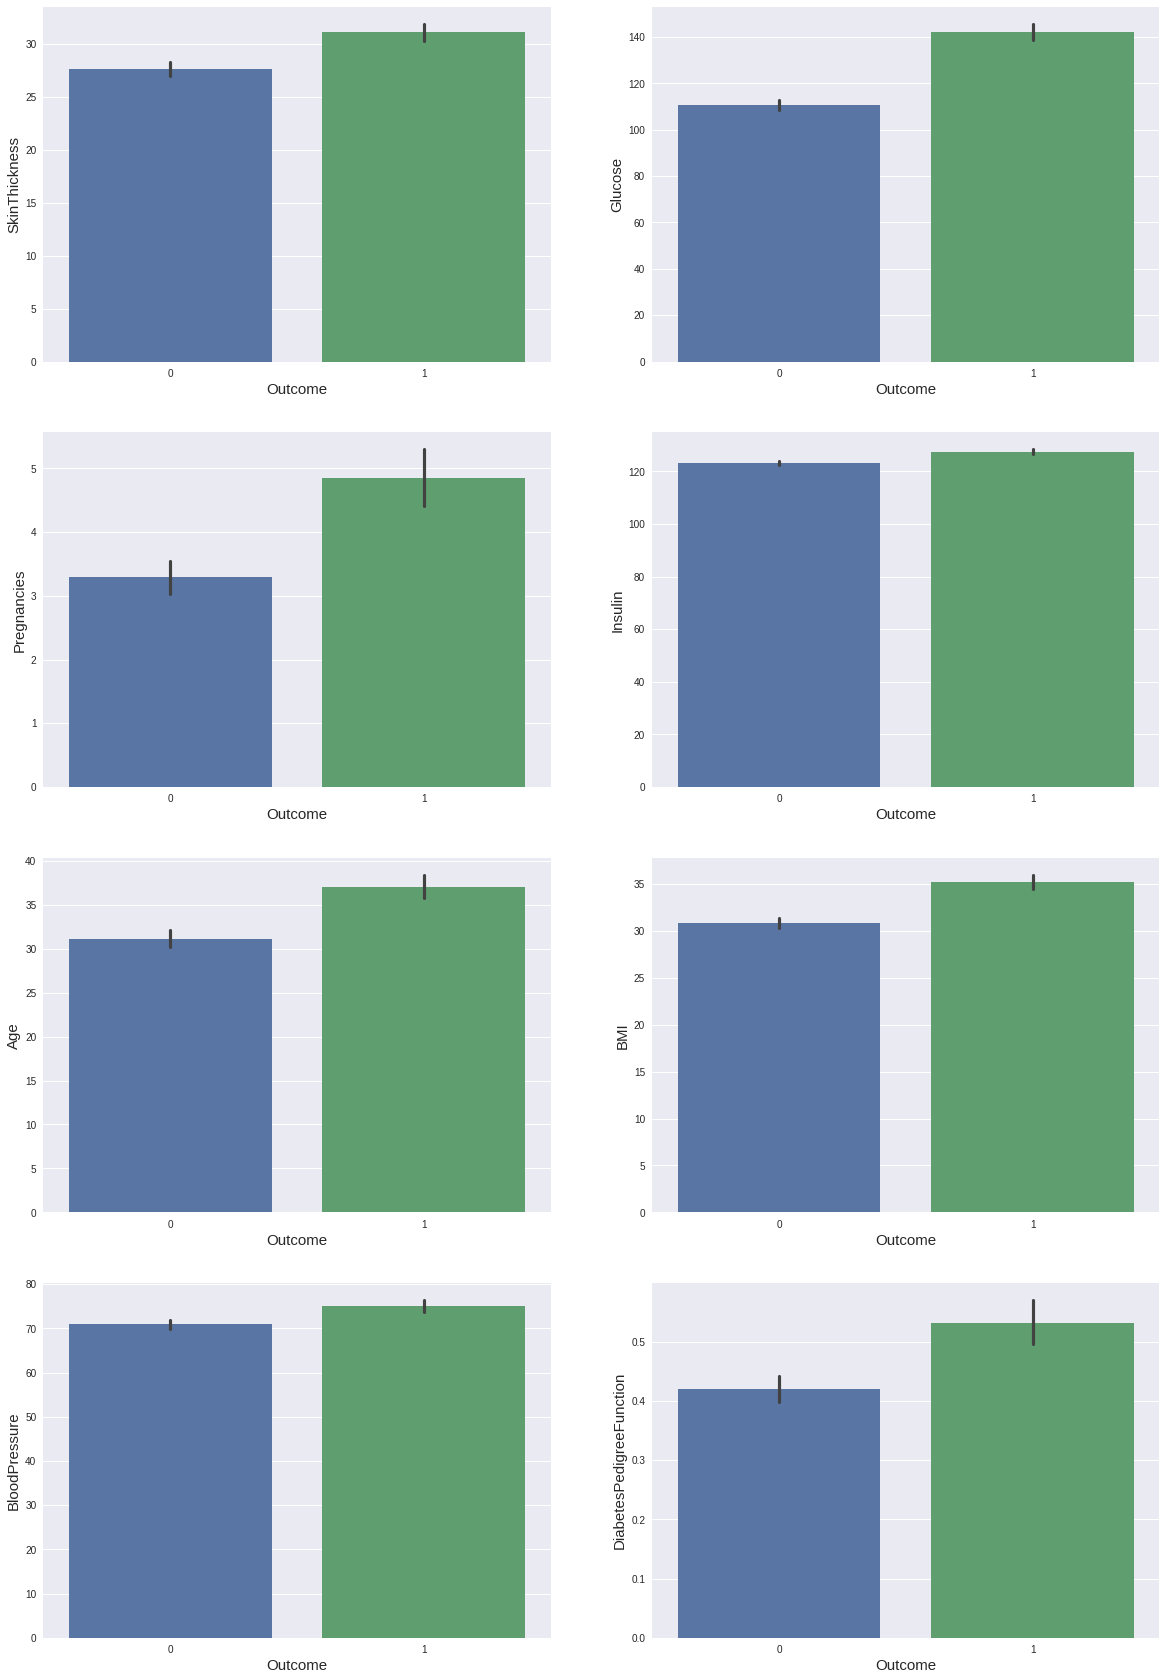

In [ ]:
plt.figure(figsize=(20,30))
for i,col in enumerate(set(df.columns)-{"Outcome"}):
    plt.subplot(4,2,i+1)
    sns.barplot(data=df,x="Outcome",y=col,)
    plt.xlabel("Outcome", fontsize=15)
    plt.xticks(fontsize=10)
    plt.ylabel(col,fontsize=15)
    plt.yticks(fontsize=10)

In [ ]:
"""We can see that all people that have diabetes also have high percentage of BloodPressure, BMI, Insulin, DiabetesPedigreeFunction, SkinThickness, 
   Glucose and Pregnancies also they are more older
"""